# Immediate False Memories Analysis

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scikit_posthocs as sp


# Load data
# Assuming 'df' is your DataFrame and it has columns 'none', 'survey-based', 'static-chatbot', 'chatbot' with the data
df = pd.read_csv('main_data.csv')

# # Create a new DataFrame with only the columns you need
# df_classes = df[['none', 'survey-based', 'static-chatbot', 'chatbot']]

In [ ]:
# Removing header rows
df = df.iloc[2:]
df

In [ ]:
# Convert 'StartDate' to datetime using .loc to avoid SettingWithCopyWarning
df.loc[:, 'StartDate'] = pd.to_datetime(df['StartDate'])

In [ ]:
# Convert 'StartDate' to datetime using .loc to avoid SettingWithCopyWarning
df.loc[:, 'StartDate'] = pd.to_datetime(df['StartDate'])

# Example filter: All entries after March 1, 2024
filter_date = pd.Timestamp('15-04-2024')

# Assuming 'ResponseId' might be used as a placeholder for an ID filter
# This is just a demonstration since we don't have specifics about the prolific ID.
# filtered_df = df[(df['StartDate'] >= filter_date) & (df['Status'] != 'Survey Preview') & ((df['attention_check_1'] != 'Probably not') or (df['attention_check_2'] != 'Yes') or (df['attention_check_3'] != 'Definitely not'))]

filtered_df = df[
    (df['StartDate'] >= filter_date) &
    (df['Status'] != 'Survey Preview') &
    (
        (df['attention_check_1'] == 'Probably not') &
        (df['attention_check_2'] == 'Yes') &
        (df['attention_check_3'] == 'Definitely not')
    )
]


In [ ]:
latest_index_1 = filtered_df[filtered_df['Exp_condition'] == 'none'].index[-1]
latest_index_2 = filtered_df[filtered_df['Exp_condition'] == 'chatbot'].index[-1]
filtered_df = filtered_df.drop(index=latest_index_1)
filtered_df = filtered_df.drop(index=latest_index_2)

In [ ]:
# Specifying the columns to keep
columns_to_keep = ['Exp_condition', 'PostQues_3', 'PostQues_10', 'PostQues_14', 'PostQues_20', 'PostQues_25']

# Creating a new DataFrame with only the selected columns
filtered_columns_df = filtered_df[columns_to_keep]

In [24]:
filtered_columns_df

,Exp_condition,PostQues_3,PostQues_10,PostQues_14,PostQues_20,PostQues_25
36,survey-based,Uncertain if yes or no,Probably yes,Uncertain if yes or no,Uncertain if yes or no,No
37,static-chatbot,Uncertain if yes or no,Probably not,No,Uncertain if yes or no,No
38,none,Definitely not,No,No,Uncertain if yes or no,Definitely not
39,chatbot,Uncertain if yes or no,Probably not,No,No,No
40,none,No,Yes,No,Uncertain if yes or no,No
...,...,...,...,...,...,...
236,static-chatbot,Probably yes,Definitely yes,No,Yes,Uncertain if yes or no
237,static-chatbot,Definitely not,Probably yes,Probably not,Yes,Uncertain if yes or no
239,survey-based,Uncertain if yes or no,No,Definitely not,Definitely yes,Definitely not
240,chatbot,Uncertain if yes or no,Yes,No,Uncertain if yes or no,No


In [28]:
 # Define the mapping from text to numeric values
replacement_map = {
    'Definitely yes': 7,
    'Yes': 6,
    'Probably yes': 5,
    'Uncertain if yes or no': 4,
    'Probably not': 3,
    'No': 2,
    'Definitely not': 1
}

# Replace the categorical responses with numeric values across the Da|taFrame
filtered_columns_df.replace(replacement_map, inplace=True)

# Display the first few rows to confirm the replacements
filtered_columns_df

C:\Users\rumucao\AppData\Local\Temp\ipykernel_6564\3387297250.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_columns_df.replace(replacement_map, inplace=True)
C:\Users\rumucao\AppData\Local\Temp\ipykernel_6564\3387297250.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns_df.replace(replacement_map, inplace=True)


,Exp_condition,PostQues_3,PostQues_10,PostQues_14,PostQues_20,PostQues_25
36,survey-based,4,5,4,4,2
37,static-chatbot,4,3,2,4,2
38,none,1,2,2,4,1
39,chatbot,4,3,2,2,2
40,none,2,6,2,4,2
...,...,...,...,...,...,...
236,static-chatbot,5,7,2,6,4
237,static-chatbot,1,5,3,6,4
239,survey-based,4,2,1,7,1
240,chatbot,4,6,2,4,2


In [30]:
filtered_columns_df

,Exp_condition,PostQues_3,PostQues_10,PostQues_14,PostQues_20,PostQues_25
36,survey-based,4,5,4,4,2
37,static-chatbot,4,3,2,4,2
38,none,1,2,2,4,1
39,chatbot,4,3,2,2,2
40,none,2,6,2,4,2
...,...,...,...,...,...,...
236,static-chatbot,5,7,2,6,4
237,static-chatbot,1,5,3,6,4
239,survey-based,4,2,1,7,1
240,chatbot,4,6,2,4,2


In [48]:
filtered_columns_df['false_memories'] = filtered_columns_df.apply(lambda row: (row.iloc[1:] > 4).sum(), axis=1)

C:\Users\rumucao\AppData\Local\Temp\ipykernel_6564\4278997254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns_df['false_memories'] = filtered_columns_df.apply(lambda row: (row.iloc[1:] > 4).sum(), axis=1)


In [54]:
filtered_columns_df
write.csv(filtered_columns_df, "filtered_columns_df.csv", row.names == FALSE)

NameError: name 'write' is not defined

In [ ]:
control_df = filtered_columns_df.loc[filtered_columns_df['Exp_condition'] == 'none']
survey_df = filtered_columns_df.loc[filtered_columns_df['Exp_condition'] == 'survey-based']
prescripted_df = filtered_columns_df.loc[filtered_columns_df['Exp_condition'] == 'static-chatbot']
generative_df = filtered_columns_df.loc[filtered_columns_df['Exp_condition'] == 'chatbot']

In [ ]:
DeepnoteChart(filtered_columns_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"sort":{"order":"ascending","encoding":"y"},"type":"nominal","field":"Exp_condition","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"false_memories","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"average","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [ ]:
DeepnoteChart(control_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":true,"axis":{"grid":false},"sort":null,"type":"quantitative","field":"false_memories"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}""")

In [ ]:
DeepnoteChart(survey_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":true,"axis":{"grid":false},"sort":null,"type":"quantitative","field":"false_memories"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}""")

In [ ]:
DeepnoteChart(prescripted_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":true,"axis":{"grid":false},"sort":null,"type":"quantitative","field":"false_memories"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}""")

In [ ]:
DeepnoteChart(generative_df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":true,"axis":{"grid":false},"sort":null,"type":"quantitative","field":"false_memories"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}""")

In [34]:
# Assuming 'filtered_columns_df' is your DataFrame and it includes the 'Exp_condition' column
exp_condition_counts = filtered_columns_df['Exp_condition'].value_counts()

# Print the counts of each experimental condition
print(exp_condition_counts)

Exp_condition
survey-based      50
static-chatbot    50
none              50
chatbot           50
Name: count, dtype: int64


In [36]:
# Initialize a dictionary to store lists of false_memories for each unique Exp_condition
condition_dict = {}

# Loop through each row in the DataFrame
for index, row in filtered_columns_df.iterrows():
    condition = row['Exp_condition']
    memory = row['false_memories']  # Assuming 'false_memories' holds the values to store

    # If the condition is not yet a key in the dictionary, add it with an empty list
    if condition not in condition_dict:
        condition_dict[condition] = []

    # Append the false memory to the appropriate list
    condition_dict[condition].append(memory)


In [38]:
print(condition_dict)

{'survey-based': [1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 3, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 3, 2, 1, 0, 2, 1, 1], 'static-chatbot': [0, 0, 1, 0, 1, 3, 2, 1, 0, 4, 0, 1, 1, 1, 0, 0, 3, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 4, 1, 4, 1, 2, 1, 2, 0, 3, 1, 0, 4, 3, 3, 3, 0, 0, 2, 3, 2], 'none': [0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2], 'chatbot': [0, 0, 2, 1, 0, 4, 0, 3, 2, 1, 5, 4, 2, 1, 2, 3, 2, 2, 3, 0, 1, 1, 4, 2, 0, 3, 2, 0, 2, 1, 2, 3, 3, 2, 2, 2, 2, 0, 2, 3, 3, 2, 2, 3, 0, 3, 0, 2, 1, 1]}


In [40]:
# Define the specific order of conditions
ordered_conditions = ['none', 'survey-based', 'static-chatbot', 'chatbot']

# Prepare data for plotting according to the specified order
memory_lists_ordered = [condition_dict[condition] for condition in ordered_conditions if condition in condition_dict]

In [42]:
# Prepare data for plotting according to the specified order and calculate mean and standard error
means = []
errors = []
sds = []
for condition in ordered_conditions:
    if condition in condition_dict:
        values = condition_dict[condition]
        mean = np.mean(values)
        # Calculate the standard error as the error bar (standard deviation divided by the square root of the sample size)
        std = np.std(values)
        error = np.std(values) / np.sqrt(len(values))
        means.append(mean)
        sds.append(std)
        errors.append(error)

In [44]:
ordered_labels = ['none', 'survey based', 'prescripted chatbot', 'generative chatbot']
colors = ['#B0B0B0', '#88CCEE', '#DDCC77', '#CC6677']

0 and 1 with id: 0
0 and 2 with id: 1
0 and 3 with id: 2
1 and 3 with id: 3


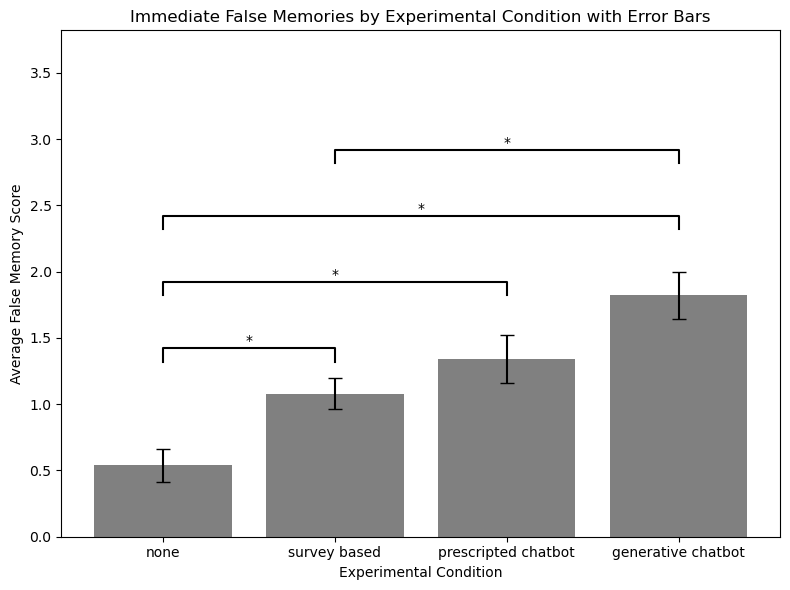

In [46]:
 # X positions
x_pos = np.arange(len(ordered_conditions))

# Significance values (p-values) for the significance markers
significance_values = [
    ((0, 1), '*'), # Between 'none' and 'survey-based'
    ((0, 2), '*'), # Between 'none' and 'static-chatbot'
    ((0, 3), '*'),# Between 'none' and 'chatbot'    
    ((1, 3), '*'), # Between 'survey-based' and 'chatbot'
]

# Creating the bar plot with error bars
plt.figure(figsize=(8, 6))
bars = plt.bar(x_pos, means, yerr=errors, capsize=5, color='grey')
plt.title('Immediate False Memories by Experimental Condition with Error Bars')
plt.ylabel('Average False Memory Score')
plt.xlabel('Experimental Condition')
plt.xticks(x_pos, ordered_labels)

# Adding significance markers with p-values, separate and not overlapping
y_base_offset = 0.6  # Base vertical offset for significance lines
y_increment = 0.5  # Increment for each subsequent significance marker

# Initialize the first y position above the highest bar
current_y_position = min(means) + max(errors) + y_base_offset

for idx, ((i, j), label) in enumerate(significance_values):
    x1, x2 = x_pos[i], x_pos[j]
    print("{1} and {2} with id: {0}".format(idx, x1, x2))
    y = current_y_position
    h, col = 0.1, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1 + x2) * 0.5, y + h, label, ha='center', va='bottom', color=col)
    current_y_position += y_increment  # Update the y position for the next marker

# Adjust plot limits to make space for significance markers
plt.ylim(0, current_y_position + y_increment)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
 # X positions
x_pos = np.arange(len(ordered_conditions))

# Significance values (p-values) for the significance markers
significance_values = [
    ((0, 1), '** P=0.0058'), # Between 'none' and 'survey-based'
    ((0, 2), '** P=0.0014'), # Between 'none' and 'prescript-chatbot'
    ((0, 3), '**** P=1.01e-7'),# Between 'none' and 'generative chatbot'    
    ((1, 3), '* P=0.0115'), # Between 'survey-based' and 'generative chatbot'
    ((2, 3), '* P=0.0395'), # Between 'prescript-chatbot' and 'generative chatbot'
]

# Creating the bar plot with error bars
plt.figure(figsize=(8, 6))
bars = plt.bar(x_pos, means, yerr=errors, capsize=5, color=colors)
plt.title('Immediate False Memories by Experimental Condition with Error Bars')
plt.ylabel('Average Number of False Memories')
plt.xlabel('Experimental Condition')
plt.xticks(x_pos, ordered_labels)

# Adding significance markers with p-values, separate and not overlapping
y_base_offset = 0.7  # Base vertical offset for significance lines
y_increment = 0.3  # Increment for each subsequent significance marker

# Initialize the first y position above the highest bar
current_y_position = min(means) + max(errors) + y_base_offset

for idx, ((i, j), label) in enumerate(significance_values):
    x1, x2 = x_pos[i], x_pos[j]
    print("{1} and {2} with id: {0}".format(idx, x1, x2))
    y = current_y_position
    h, col = 0.1, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1 + x2) * 0.5, y + h, label, ha='center', va='bottom', color=col)
    current_y_position += y_increment  # Update the y position for the next marker

# Adjust plot limits to make space for significance markers
plt.ylim(0, current_y_position + y_increment)

# Improve layout
plt.tight_layout()

plt.savefig('immediate_false_mem.png')
#plt.savefig('foo.png', bbox_inches='tight')

# Show the plot
plt.show()




## Mean, SD, Error for Immediate False Memories

In [ ]:
print(ordered_conditions)
print (means) 
print(sds)
print(errors)

# Normality testing

In [ ]:
from scipy.stats import shapiro

# Initialize a dictionary to store the test results
shapiro_results = {}

# Perform the Shapiro-Wilk test for each condition and store the results
for condition in ordered_conditions:
    if condition in condition_dict:
        values = np.array(condition_dict[condition])  # Convert list to NumPy array for processing
        test_statistic, p_value = shapiro(values)
        shapiro_results[condition] = (test_statistic, p_value)

# Display the results
for condition, results in shapiro_results.items():
    print(f"Condition: {condition}\nShapiro-Wilk Test Statistic: {results[0]}, P-Value: {results[1]}\n")

# 

# Kruskal-Wallis Test

In [ ]:
from scipy.stats import kruskal

# Prepare data for the test, ensuring only non-empty lists are included
data = [condition_dict[condition] for condition in ordered_conditions if condition in condition_dict and len(condition_dict[condition]) > 0]

# Check if we have enough groups with data to perform Kruskal-Wallis
if len(data) >= 2:  # We need at least two groups to compare
    # Perform the Kruskal-Wallis H Test
    test_statistic, p_value = kruskal(*data)
    print(f"Kruskal-Wallis H Test Statistic: {test_statistic}, P-Value: {p_value}")
else:
    print("Not enough data to perform Kruskal-Wallis test.")


In [ ]:
# checking how data looks like
print(data)

## Posthoc Dunn Test with Benjamini–Hochberg FDR

In [ ]:
#Dunn Test with Benjamini–Hochberg FDR correction

dunn_results_fdr = sp.posthoc_dunn(data, group_col='condition', p_adjust='fdr_bh')

# Print the adjusted p-values for pairwise comparisons
print("Adjusted p-values for pairwise comparisons with FDR:")
print(dunn_results_fdr)
print(dunn_results_fdr <0.05)

#None - 1, survey - 2, prescript - 3, generative - 4

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e32e89f2-6d44-49b2-bfdc-83c1c87a0fb5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>